<a href="https://colab.research.google.com/github/Animichael/Loan-Approval-model/blob/main/Loan_Appoval_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

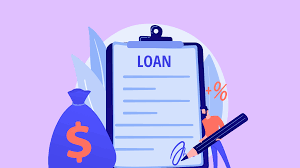

**IMPORTING  THE NECESSARY LIBRARIES FOR THE PROJECT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

**DATA READING**

In [ ]:
# loading the dataset into a pandas dataframe
df = pd.read_csv("/content/loan_approval_dataset.csv")

In [ ]:
# viewing the dataset
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# checking for the names of the features in the dataset
for features in df.columns:
  print(features)

  # You can also check for the features using this other option
  df.columns

loan_id
 no_of_dependents
 education
 self_employed
 income_annum
 loan_amount
 loan_term
 cibil_score
 residential_assets_value
 commercial_assets_value
 luxury_assets_value
 bank_asset_value
 loan_status


In [ ]:
# checking for the number of instances and features in the dataset
df.shape

(4269, 13)

In [ ]:
# checking for missing value sin the dataset
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
# checking for the the sum of all the missing value sin the entire dataset
print("The total number of missing values in the entire dataset is", df.isna().sum().sum())

The total number of missing values in the entire dataset is 0


In [ ]:
# checking if there are duplicates entries in the dataset
df.duplicated().sum()

0

In [ ]:
# getting more detailed information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# getting the statical description about our dataset
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


**EDA**

In [ ]:
df[' no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1])

In [ ]:
df.groupby(' no_of_dependents')[' no_of_dependents'].value_counts()

,count
no_of_dependents,
0,712
1,697
2,708
3,727
4,752
5,673


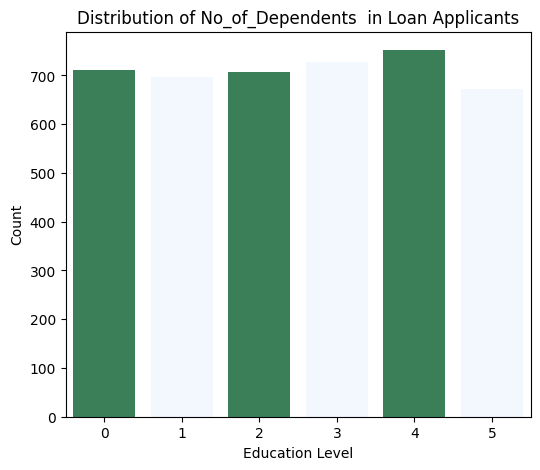

In [ ]:
plt.figure(figsize=(6, 5))
# Create countplot
sns.countplot(x=' no_of_dependents', data=df, palette=['seagreen', 'aliceblue'])
# Add title and labels
plt.title("Distribution of No_of_Dependents  in Loan Applicants")
plt.xlabel("Education Level")
plt.ylabel("Count")
# Show plot
plt.show()

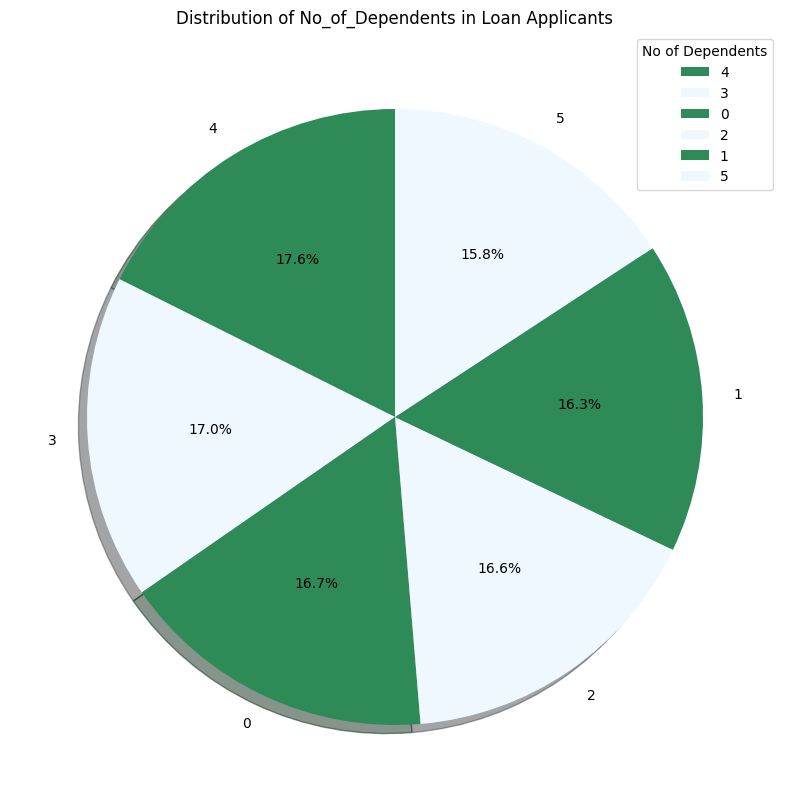

In [ ]:
# visualizing the no of dependent variable using a pie chart with shado effects
dependents_counts = df[' no_of_dependents'].value_counts()

# Define labels and values
labels = dependents_counts.index  # Unique categories in 'no_of_dependents'
sizes = dependents_counts.values  # Corresponding counts

# Create the pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=['seagreen', 'aliceblue'], shadow=True
)

# Add a legend
plt.legend(wedges, labels, title="No of Dependents", loc="best")

# Add title
plt.title("Distribution of No_of_Dependents in Loan Applicants")

# Show plot
plt.show()

In [ ]:
for index in dependents_counts.index:
  print(index)

4
3
0
2
1
5


In [ ]:
df[' no_of_dependents'].value_counts()

,count
no_of_dependents,
4,752
3,727
0,712
2,708
1,697
5,673


**CHECKING FOR BALANCE CLASSES IN THE DATASET**

In [ ]:
df[" loan_status"].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


Text(0, 0.5, 'Count')

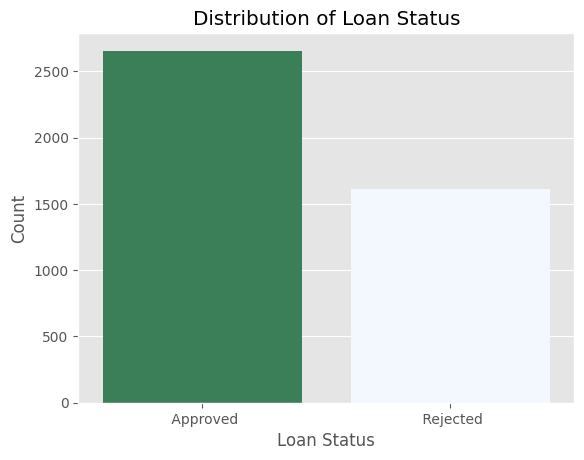

In [ ]:
plt.style.use('ggplot')
sns.countplot(x=" loan_status", data=df, palette=['seagreen', 'aliceblue'])
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")

In [ ]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
# removing the spaces in the cells
df.colums=df.columns.str.lstrip([""])

In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

**PERFORMING DATA ENCODING**

In [ ]:
map = {' Yes': 1, ' No': 0}
df[' self_employed'] = df[' self_employed'].map(map)

map = {' Graduate': 1, ' Not Graduate': 0}
df[' education'] = df[' education'].map(map)

map = {' Approved': 1, ' Rejected': 0}
df[' loan_status'] = df[' loan_status'].map(map)

In [ ]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


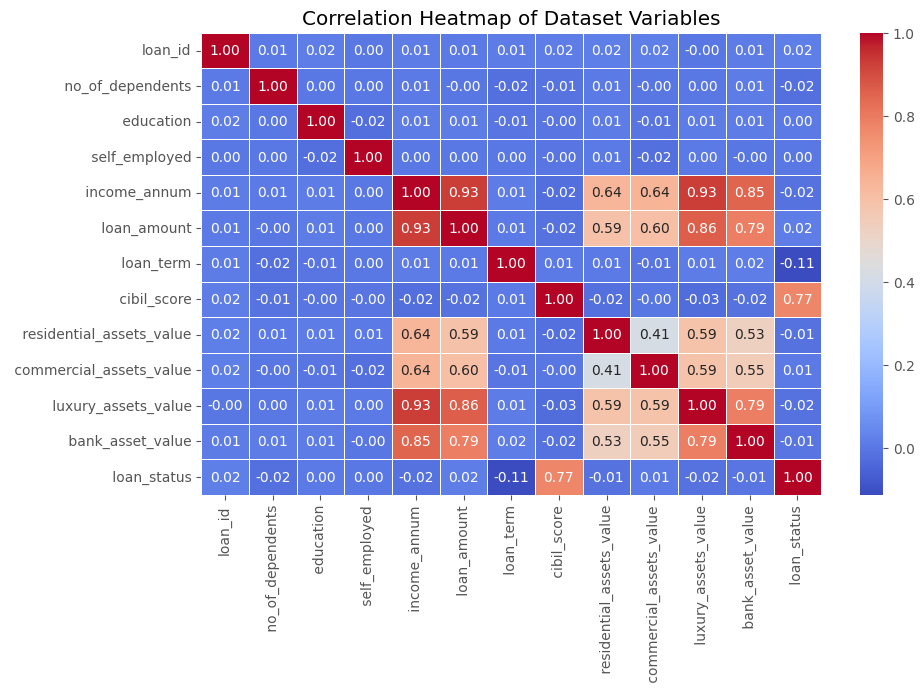

In [ ]:
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Dataset Variables")

# Show plot
plt.show()

In [ ]:
df.drop(['loan_id', ' no_of_dependents', ' education', ' self_employed'], axis =1, inplace=True)

In [ ]:
df

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...
4264,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


**DATA SPLITTING**

In [ ]:
y = df[' loan_status']
x=df.drop(' loan_status', axis=1)


In [ ]:
# printing the content of the y variable
y

,loan_status
0,1
1,0
2,0
3,0
4,0
...,...
4264,0
4265,1
4266,0
4267,1


In [ ]:
print(x)

      income_annum  loan_amount  loan_term  cibil_score  \
0          9600000     29900000         12          778   
1          4100000     12200000          8          417   
2          9100000     29700000         20          506   
3          8200000     30700000          8          467   
4          9800000     24200000         20          382   
...            ...          ...        ...          ...   
4264       1000000      2300000         12          317   
4265       3300000     11300000         20          559   
4266       6500000     23900000         18          457   
4267       4100000     12800000          8          780   
4268       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  450

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[ 1.61797904,  1.63305171,  0.19261651, ...,  2.877289  ,
         0.83202837,  0.93030441],
       [-0.34174956, -0.32441406, -0.50809068, ..., -0.63192107,
        -0.69499321, -0.51593638],
       [ 1.4398219 ,  1.61093345,  1.59403089, ..., -0.10781827,
         1.99651964,  2.40731629],
       ...,
       [ 0.51340474,  0.96950399,  1.2436773 , ...,  1.69236092,
         0.3266831 ,  0.71490685],
       [-0.34174956, -0.25805929, -0.50809068, ..., -0.97372725,
        -0.11274758,  0.25334064],
       [ 1.47545332,  1.61093345, -0.15773708, ...,  1.55563845,
         2.26017804,  2.16114764]])

In [ ]:
scaler2 = MinMaxScaler()
x_scaled2 = scaler2.fit_transform(x)

In [ ]:
x_scaled2

array([[0.96907216, 0.75510204, 0.55555556, ..., 0.90721649, 0.57583548,
        0.54421769],
       [0.40206186, 0.30357143, 0.33333333, ..., 0.11340206, 0.218509  ,
        0.2244898 ],
       [0.91752577, 0.75      , 1.        , ..., 0.23195876, 0.84832905,
        0.8707483 ],
       ...,
       [0.64948454, 0.60204082, 0.88888889, ..., 0.63917526, 0.45758355,
        0.49659864],
       [0.40206186, 0.31887755, 0.33333333, ..., 0.03608247, 0.35475578,
        0.39455782],
       [0.92783505, 0.75      , 0.44444444, ..., 0.60824742, 0.91002571,
        0.81632653]])

**SPLITTING OUR DATASET INTO TRAINING AND TEST DATA**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
print(xtrain.shape)

(3415, 8)


**MODEL SELECTION**

In [ ]:
from sklearn.linear_model import LogisticRegression

**MODEL TRAINING**

In [ ]:
model = LogisticRegression()

In [ ]:
# fit
loan_model =model.fit(xtrain, ytrain)

In [ ]:
print(xtrain.shape, ytrain.shape)

(3415, 8) (3415,)


In [ ]:
print(xtest.shape, ytest.shape)

(854, 8) (854,)


In [ ]:
y_pred= loan_model.predict(xtrain)

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
train_accuracy = accuracy_score(ytrain, y_pred)

In [ ]:
print("The model training accuarcy is: ", round(train_accuracy, 2))

The model training accuarcy is:  0.92


In [ ]:
x_predict =loan_model.predict(xtest)

In [ ]:
x_predict

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
test_accuarcy = accuracy_score(ytest, x_predict)

In [ ]:
test_accuarcy

0.905152224824356